In [267]:
import numpy as np
from qiskit import *
from qiskit import IBMQ
from qiskit import(QuantumCircuit,execute,Aer)
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

In [268]:
#simulator = Aer.get_backend('qasm_simulator')

In [269]:
from qiskit.visualization import plot_histogram

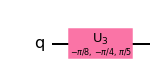

In [270]:
#Create a quantum register with 1 qubit.
qr = QuantumRegister(1,'q')

#Define an arbitrary quantum circuit.
circuit = QuantumCircuit(qr)

#Apply a U3 gate to achieve any point on the Bloch sphere given any theta, phi, and lambda.
circuit.u3(-np.pi/8,-np.pi/4,np.pi/5,0)

#Draw quantum circuit with the specified U3 gate.
circuit.draw(output = 'mpl')

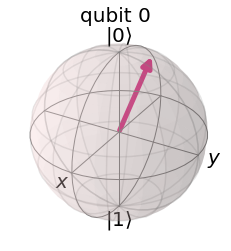

In [271]:
%matplotlib inline
backend = Aer.get_backend('statevector_simulator')
out = execute(circuit,backend).result().get_statevector()

#Show bloch sphere with the arbitrary state vector
plot_bloch_multivector(out)


Counts =  {'0': 1024}

States psi and phi are in the same quantum state.


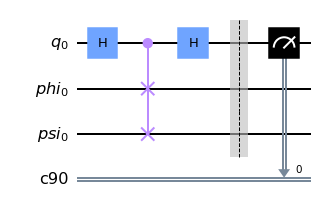

In [272]:
#Create two quantum registers each with a qubit.
qr1 = QuantumRegister(1,'phi')
qr2 = QuantumRegister(1,'psi')

#Create a classical register with 1 classical bit.
cr = ClassicalRegister(1)

#Define quantum circuit
circuit = QuantumCircuit(qr,qr1,qr2,cr)

#Apply hadamard gate on the arbitary ancilla qubit. 
circuit.h(0)

#Apply controlled swap gate using the ancilla qubit as control and phi and psi as targets.
circuit.cswap(qr[0],qr1[0],qr2[0])
circuit.h(0)
circuit.barrier()

circuit.measure(qr[0],cr[0])

result = execute(circuit,simulator,shot = 1000).result()
counts = result.get_counts(circuit)
print("\nCounts = ", counts)

for i in counts:
    if i == "0":
        print("\nStates psi and phi are in the same quantum state.")
    if i != "0":
        print("\nStates psi and phi are NOT in the same quantum state.")

circuit.draw(output = 'mpl')

Because phi and psi are orthogonal quantum states, we observe that the control qubit is measured to be in the |0> state with 100% probability after performing the controlled swap gate. The equation describing the measurement is given by $(|\psi> |\phi> \otimes  |0> + |\phi> |\psi> \otimes  |1> ) / sqrt(2)$ which tells us if phi and psi are the same or different. 


Counts =  {'0': 1024}


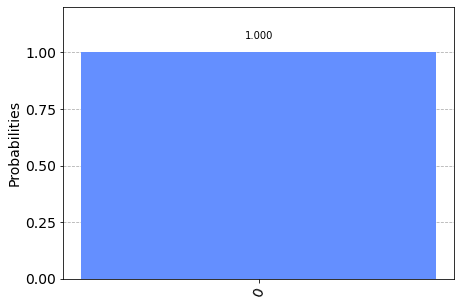

In [273]:
print("\nCounts = ", counts)
plot_histogram(counts)


Counts first qubit =  {'111': 1024}

Counts second qubit =  {'111': 1024}

Counts third qubit =  {'111': 1024}


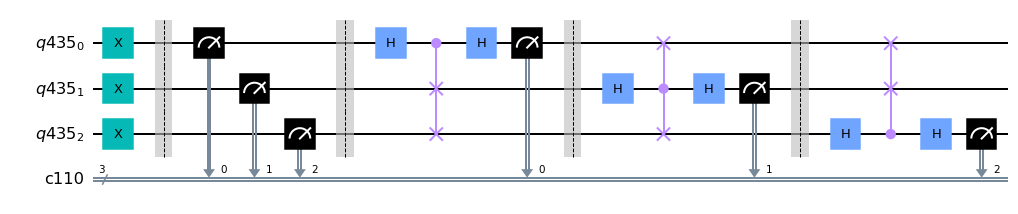

In [316]:
#Define quantum circuit with a random number of qubits.
N = 3
qr = QuantumRegister(N)
cr = ClassicalRegister(N)
circuit = QuantumCircuit(qr,cr)
for qubit in range(N):
    circuit.x(qubit)

#Here, the swap test algorithm is fed a three qubit quantum state (product state = |111>) 
#where all qubits are in the |1> state.

circuit.barrier()
circuit.measure([0,1,2],[0,1,2])
################

circuit.barrier()
circuit.h(0)
circuit.cswap(0,1,2)
circuit.h(0)
circuit.measure(0,0)
result1 = execute(circuit,simulator,shot = 1000).result()
counts1 = result1.get_counts(circuit)
print("\nCounts first qubit = ", counts1)

circuit.barrier()
circuit.h(1)
circuit.cswap(1,2,0)
circuit.h(1)
circuit.measure(1,1)
result2 = execute(circuit,simulator,shot = 1000).result()
counts2 = result2.get_counts(circuit)
print("\nCounts second qubit = ", counts2)

circuit.barrier()
circuit.h(2)
circuit.cswap(2,1,0)
circuit.h(2)
circuit.measure(2,2)
result3 = execute(circuit,simulator,shot = 1000).result()
counts3 = result3.get_counts(circuit)
print("\nCounts third qubit = ", counts3)
##################

circuit.draw(output = 'mpl')

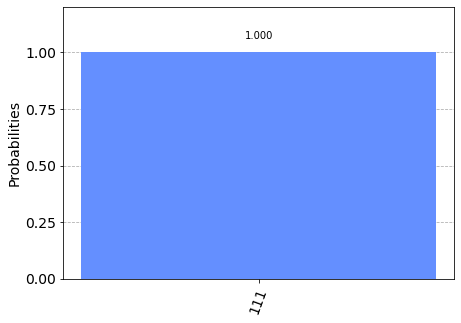

In [317]:
plot_histogram(counts1)

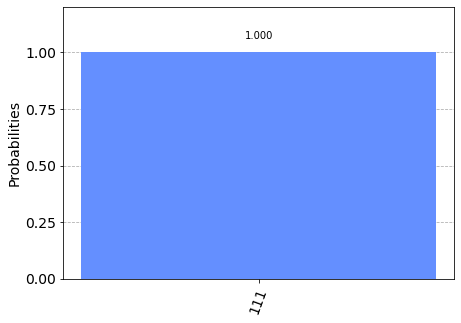

In [318]:
plot_histogram(counts2)

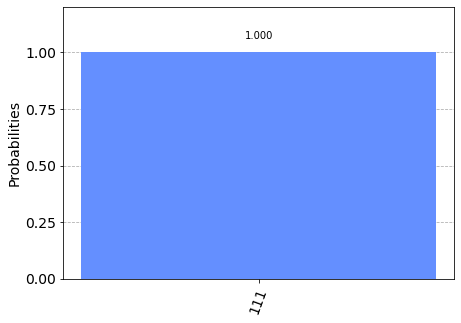

In [319]:
plot_histogram(counts3)

Because each qubit in the product state was prepared in the |1> quantum state using the X gate, the swap tests correctly identified that the 2nd and 3rd qubits were in the same state, the 1st and 3rd qubits were in the same state, and the 1st and 2nd qubits were in the same state. If the probabilties were not always 100%, then we would know a pair of qubits were not in the same state, and an additional gate would have to be applied until the swap tests yielded a result that reproduced the product state. 